In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [32]:
df = pd.read_csv("datathon_2024_dataset_corrected.csv")
df.head()

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,...,1,38,5,1,0,1,24,4,3,0
1,1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,...,1,44,5,0,0,0,24,9,6,0
2,2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,...,0,32,5,0,0,2,17,6,1,1
3,3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,...,0,20,3,1,0,1,10,4,1,0
4,4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,...,0,38,9,3,0,0,17,7,1,1


In [33]:
df.columns

Index(['Unnamed: 0', 'game_date', 'home_team', 'away_team', 'is_day_game',
       'home_score', 'away_score', 'venue', 'venue_name', 'city', 'state',
       'away_pa', 'away_1b', 'away_2b', 'away_3b', 'away_hr', 'away_fo',
       'away_so', 'away_bb', 'away_hbp', 'home_pa', 'home_1b', 'home_2b',
       'home_3b', 'home_hr', 'home_fo', 'home_so', 'home_bb', 'home_hbp'],
      dtype='object')

In [34]:
df["home_team"].unique()

array(['NYN', 'CHN', 'ATL', 'CIN', 'FLO', 'MON', 'SLN', 'ANA', 'BAL',
       'MIN', 'OAK', 'TEX', 'TOR', 'ARI', 'PIT', 'SEA', 'HOU', 'KCA',
       'TBA', 'COL', 'MIL', 'PHI', 'SDN', 'SFN', 'BOS', 'DET', 'NYA',
       'LAN', 'CHA', 'CLE', 'WAS', 'MIA'], dtype=object)

In [35]:
df[df["home_team"]=="HOU"]

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp
57,57,20000407,HOU,PHI,False,1,4,HOU03,Minute Maid Park,Houston,...,0,32,4,0,0,1,20,5,2,0
72,72,20000408,HOU,PHI,True,8,5,HOU03,Minute Maid Park,Houston,...,1,38,6,1,2,2,19,5,3,0
87,87,20000409,HOU,PHI,True,2,3,HOU03,Minute Maid Park,Houston,...,0,37,4,1,0,0,18,7,6,1
99,99,20000410,HOU,SLN,False,7,8,HOU03,Minute Maid Park,Houston,...,1,36,2,1,0,4,18,7,3,1
107,107,20000411,HOU,SLN,False,6,10,HOU03,Minute Maid Park,Houston,...,0,37,4,1,1,2,19,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56610,56610,20230919,HOU,BAL,False,5,9,HOU03,Minute Maid Park,Houston,...,1,39,5,2,0,3,16,9,3,1
56625,56625,20230920,HOU,BAL,True,2,1,HOU03,Minute Maid Park,Houston,...,0,34,3,2,0,0,13,10,5,1
56649,56649,20230922,HOU,KCA,False,5,7,HOU03,Minute Maid Park,Houston,...,2,41,3,2,1,2,19,8,6,0
56663,56663,20230923,HOU,KCA,False,2,3,HOU03,Minute Maid Park,Houston,...,0,37,3,2,0,1,20,7,3,1


In [36]:
home_home = {'win': 0, 'lose': 0, 'tie': 0}
home_away = {'win': 0, 'lose': 0, 'tie': 0}
away_home = {'win': 0, 'lose': 0, 'tie': 0}
away_away = {'win': 0, 'lose': 0, 'tie': 0}
astros = df[(df["home_team"] == 'HOU') | (df["away_team"] == 'HOU')]

In [37]:
for i in range(len(astros)-1):
    if astros.iloc[i]['home_team'] == 'HOU':
        if astros.iloc[i+1]['home_team'] == 'HOU':
            if astros.iloc[i+1]['home_score']>astros.iloc[i+1]['away_score']:
                home_home['win']+=1;
            elif astros.iloc[i+1]['home_score']<astros.iloc[i+1]['away_score']:
                home_home['lose']+=1;
            else:
                home_home['tie']+=1;
        else:
            if astros.iloc[i+1]['home_score']<astros.iloc[i+1]['away_score']:
                home_away['win']+=1;
            elif astros.iloc[i+1]['home_score']>astros.iloc[i+1]['away_score']:
                home_away['lose']+=1;
            else:
                home_away['tie']+=1;
    elif astros.iloc[i]['away_team'] == 'HOU':
        if astros.iloc[i+1]['home_team'] == 'HOU':
            if astros.iloc[i+1]['home_score']>astros.iloc[i+1]['away_score']:
                away_home['win']+=1;
            elif astros.iloc[i+1]['home_score']<astros.iloc[i+1]['away_score']:
                away_home['lose']+=1;
            else:
                away_home['tie']+=1;
        else:
            if astros.iloc[i+1]['home_score']<astros.iloc[i+1]['away_score']:
                away_away['win']+=1;
            elif astros.iloc[i+1]['home_score']>astros.iloc[i+1]['away_score']:
                away_away['lose']+=1;
            else:
                away_away['tie']+=1;

In [38]:
home_home

{'win': 884, 'lose': 721, 'tie': 0}

In [39]:
away_away

{'win': 755, 'lose': 854, 'tie': 1}

In [40]:
home_away

{'win': 144, 'lose': 141, 'tie': 0}

In [41]:
away_home

{'win': 157, 'lose': 128, 'tie': 0}

In [42]:
win = [0]*home_home['win'] + [1]*home_away['win'] + [2]*away_home['win'] + [3]*away_away['win']
lose = [0]*home_home['lose'] + [1]*home_away['lose'] + [2]*away_home['lose'] + [3]*away_away['lose']
tie = [0]*home_home['tie'] + [1]*home_away['tie'] + [2]*away_home['tie'] + [3]*away_away['tie']
hh_win = round(home_home['win']/sum(home_home.values()), 3)
ha_win = round(home_away['win']/sum(home_away.values()), 3)
ah_win = round(away_home['win']/sum(away_home.values()), 3)
aa_win = round(away_away['win']/sum(away_away.values()), 3)

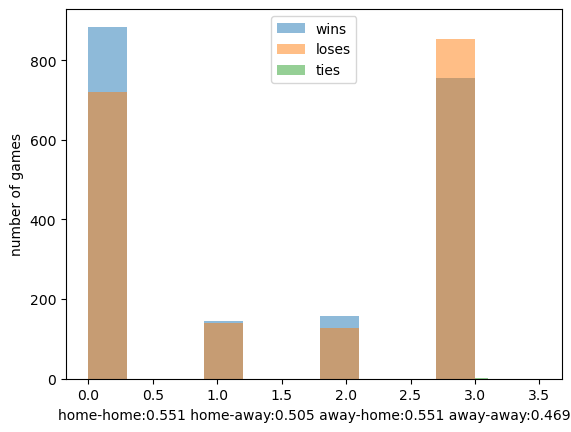

In [43]:
plt.hist(win, alpha = 0.5, label = "wins")
plt.hist(lose, alpha = 0.5, label = "loses")
plt.hist(tie, alpha = 0.5, label = "ties")
plt.legend()
plt.xlabel(f'home-home:{hh_win} home-away:{ha_win} away-home:{ah_win} away-away:{aa_win}')
plt.ylabel('number of games');

We have a first glimpse of the effect brought by travel between different cities. This is a diagram showing the winnning percentage of four situations of one team (using astros as example), astros have higher winning percentage in home-home and home-away situation, means that the players favor their home court in Houston, and we can also find out that the travel will affect the winning rate because the home-home games have the best record with the most games played.

In [46]:
df1 = pd.read_csv("datathon_2024_dataset_cleaned.csv")
df1.columns

Index(['game_date', 'home_team', 'away_team', 'is_day_game', 'home_score',
       'away_score', 'venue', 'venue_name', 'city', 'state', 'away_pa',
       'away_1b', 'away_2b', 'away_3b', 'away_hr', 'away_fo', 'away_so',
       'away_bb', 'away_hbp', 'home_pa', 'home_1b', 'home_2b', 'home_3b',
       'home_hr', 'home_fo', 'home_so', 'home_bb', 'home_hbp', 'year', 'month',
       'day', 'home_win', 'away_win', 'days_since_last_home_game',
       'days_since_last_away_game', 'last_home_opponent', 'last_away_opponent',
       'home_distance', 'away_distance'],
      dtype='object')

In [77]:
gamedate = []
for i in range(len(df1)):
    gamedate.append(datetime.strptime(df1['game_date'].values[i], '%Y-%m-%d'))

In [114]:
year = list(np.arange(2000, 2024, 1))
home_dist = np.zeros(24)
away_dist = np.zeros(24)
for i in range(len(gamedate)):
    y = gamedate[i].year
    home_dist[year.index(y)] += df1['home_distance'][i]
    away_dist[year.index(y)] += df1['away_distance'][i]

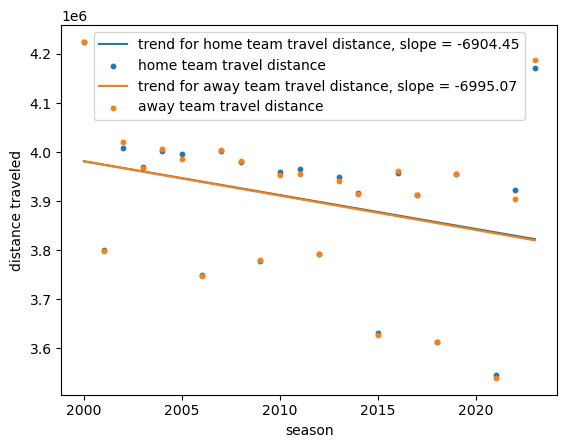

In [139]:
year = np.array(year)
total_dist = home_dist + away_dist

slope1, inter1 = np.polyfit(year[home_dist>3e6], home_dist[home_dist>3e6], 1)
plt.plot(year[home_dist>3e6], slope1*year[home_dist>3e6] + inter1, label = f'trend for home team travel distance, slope = {round(slope1, 2)}')
plt.scatter(year[home_dist>3e6], home_dist[home_dist>3e6], s = 10, label = 'home team travel distance')

slope2, inter2 = np.polyfit(year[away_dist>3e6], away_dist[away_dist>3e6], 1)
plt.plot(year[away_dist>3e6], slope2*year[away_dist>3e6] + inter2, label = f'trend for away team travel distance, slope = {round(slope2, 3)}')
plt.scatter(year[away_dist>3e6], away_dist[away_dist>3e6], s = 10, label = 'away team travel distance')

plt.xlabel('season')
plt.ylabel('distance traveled')
plt.legend()

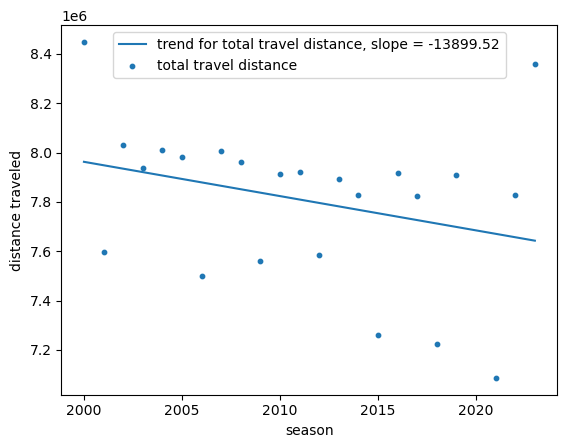

In [140]:
slope3, inter3 = np.polyfit(year[total_dist>3e6], total_dist[total_dist>3e6], 1)
plt.plot(year[total_dist>3e6], slope3*year[total_dist>3e6] + inter3, label = f'trend for total travel distance, slope = {round(slope3, 2)}')
plt.scatter(year[total_dist>3e6], total_dist[total_dist>3e6], s = 10, label = 'total travel distance')
plt.xlabel('season')
plt.ylabel('distance traveled')
plt.legend()

from the travel distance vs season diagram we can interpret that the travel distance are not flactuating too much after taking away the shortenned season in year 2020. However the evolvement of the schedule is very clear because either the home team or the away team have decrease in total distance traveled hence the total distance traveled by all teams each season is also decreasing. The decrease in distance shows the schedule is getting better for the teams.